In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.feature_selection import RFE, RFECV
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20.2f}'.format)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('/kaggle/input/trexquant-2025-summer-intern-challenge-iitkgp/TQ_Train_Kaggle.csv')
df

,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,target
0,1,1.65,-3.48,NaN,0.12,0.22,0.20,NaN,-0.29,-0.36,-1.88,-2.82,NaN,NaN,NaN,0.09,-0.72,0.12,1.11,3.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41,-0.41,0.44,0.00,NaN,-1.66,-0.63,NaN,NaN,0.77,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,-0.25,NaN,NaN,0.39,2.82,3.52,NaN,0.72,0.62,-1.01,-0.97,0.02,NaN,0.02,NaN,1.47,NaN,0.00,-3.11,NaN,-4.00,NaN,NaN,NaN,0.50,NaN,0.26,-2.20,0.66,-2.20,NaN,0.03,0.01,0.30,-0.14,-1.95,NaN,0.99,-0.08
1,2,2.55,-0.93,NaN,0.17,0.27,0.08,NaN,-0.40,-0.54,-1.87,1.22,NaN,NaN,0.08,0.85,-0.76,-0.02,2.01,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,-0.10,0.49,0.00,1.24,3.02,-0.26,NaN,NaN,-2.11,NaN,NaN,0.66,0.96,NaN,NaN,NaN,NaN,NaN,NaN,2.19,NaN,NaN,-1.22,-0.22,-3.60,NaN,0.91,-0.97,-0.77,-0.97,0.02,NaN,0.01,-0.09,-3.61,NaN,0.00,-3.11,NaN,-4.00,NaN,NaN,NaN,0.50,NaN,0.24,-0.80,0.57,-0.81,NaN,0.16,0.00,0.19,1.18,0.12,NaN,-0.22,0.06
2,3,-3.73,0.99,NaN,0.15,0.16,0.40,NaN,-0.66,1.51,-1.66,-0.90,NaN,NaN,1.00,0.59,-3.18,-0.71,-2.74,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,-0.09,0.45,0.00,1.43,1.01,-0.26,NaN,NaN,0.99,NaN,NaN,0.67,0.46,NaN,NaN,NaN,NaN,NaN,NaN,-0.13,NaN,NaN,0.44,-0.55,3.35,NaN,1.52,0.68,-0.85,0.37,0.02,NaN,0.11,0.22,0.45,NaN,0.00,-1.14,NaN,-4.00,NaN,NaN,NaN,0.76,NaN,0.22,0.15,0.52,0.21,NaN,0.04,0.00,0.18,-0.73,-0.37,NaN,0.36,0.00
3,4,2.12,0.04,NaN,0.12,0.76,-0.02,NaN,-0.27,-1.61,-1.77,-1.16,NaN,NaN,-0.22,0.43,-3.99,0.73,0.27,3.09,0.93,-0.98,-0.04,NaN,NaN,NaN,NaN,NaN,-0.09,NaN,0.09,0.35,0.44,0.00,1.53,1.90,0.24,NaN,NaN,0.10,NaN,NaN,0.81,0.65,NaN,NaN,NaN,NaN,NaN,NaN,-0.49,NaN,NaN,3.45,0.87,3.03,NaN,1.41,0.02,2.46,-0.97,0.02,-1.61,1.00,-0.05,-0.91,-0.19,-0.28,-2.55,NaN,-4.00,NaN,NaN,NaN,0.55,NaN,0.19,-0.37,0.49,-0.40,NaN,0.08,0.00,0.33,-0.40,-0.19,NaN,0.01,-0.03
4,5,-0.85,-0.02,NaN,0.22,0.12,-0.27,NaN,1.56,-0.36,-2.62,-1.59,NaN,1.15,0.52,0.32,-2.02,0.88,-0.81,-0.07,1.71,0.42,-0.83,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.09,0.21,0.43,0.00,1.49,1.88,NaN,NaN,NaN,0.70,NaN,NaN,0.87,2.47,NaN,NaN,NaN,NaN,NaN,NaN,-0.65,NaN,NaN,1.20,2.58,3.76,NaN,0.93,0.90,-1.49,0.40,0.02,NaN,0.03,-0.04,-0.94,-0.19,-0.05,-3.11,NaN,0.06,NaN,NaN,NaN,0.34,NaN,0.06,1.64,0.23,1.50,NaN,0.05,0.00,0.54,0.51,-0.08,NaN,-0.01,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105437,173625,1.14,1.10,1.11,0.07,0.00,0.50,-3.97,-0.10,-0.14,-3.05,-3.51,-2.07,NaN,NaN,NaN,-2.19,-0.19,1.33,-1.53,NaN,NaN,NaN,1.37,1.12,-1.67,0.21,-0.47,-0.34,NaN,0.05,0.43,0.86,1.00,0.34,3.12,NaN,-1.41,NaN,-1.44,-1.19,NaN,NaN,0.34,0.56,0.25,NaN,NaN,NaN,0.18,-1.02,0.31,2.77,-4.00,-2.42,3.92,NaN,-0.87,0.24,-0.04,-0.97,0.24,NaN,NaN,NaN,-4.00,NaN,0.01,0.37,NaN,0.00,NaN,0.50,-1.33,0.42,0.28,0.08,0.13,0.19,-0.80,NaN,0.14,0.02,0.46,NaN,0.10,3.48,-0.28,0.00
105438,173659,-1.37,0.29,NaN,0.06,0.00,0.16,NaN,0.34,0.24,-2.28,-1.51,-0.46,NaN,NaN,NaN,NaN,0.09,0.69,0.04,NaN,NaN,NaN,-2.43,1.14,-4.00,2.44,-0.18,NaN,NaN,0.25,0.24,NaN,0.00,0.00,2.78,-0.04,NaN,NaN,NaN,0.52,NaN,NaN,0.55,-1.46,-0.62,NaN,NaN,NaN,0.34,1.89,0.39,-0.12,1.31,-0.05,NaN,NaN,NaN,-0.78,NaN,-0.78,-0.24,NaN,NaN,NaN,2.78,NaN,-0.03,0.50,NaN,0.00,NaN,0.12,1.80,0.22,0.06,NaN,NaN,0.19,-1.41,NaN,NaN,NaN,NaN,NaN,0.92,1.09,0.98,-0.01
105439,173670,0.05,0.34,NaN,0.08,0.22,-0.16,NaN,0.18,0.18,-1.16,-2.15,-1.16,NaN,NaN,NaN,-2.17,-0.42,1.29,-1.02,NaN,NaN,NaN,-3.83,-0.30,-2.54,0.84,-0.37,-0.53,NaN,0.19,0.28,-1.21,0.00,0.34,3.12,-0.01,-2.00,NaN,NaN,0.47,NaN,NaN,0.42,-1.32,-0.38,-0.50

In [3]:
feats = list(df.drop(columns=['row_id', 'target']))

In [4]:
df = df.fillna(0)

In [5]:
for feat in feats:
    print(f'{feat}: {min(df[feat])}')

f1: -4.0
f2: -4.0
f3: -4.0
f4: 0.0
f5: 0.0
f6: -0.5
f7: -4.364358
f8: -2.8917813
f9: -4.0
f10: -4.0
f11: -4.0
f12: -4.0
f13: -4.0
f14: -4.0
f15: -4.0
f16: -4.0
f17: -1.0
f18: -4.0
f19: -4.0
f20: -4.0
f21: -4.0
f22: -4.0
f23: -4.0
f24: -1.2551287
f25: -4.0
f26: -3.9713151
f27: -0.5
f28: -0.9918397
f29: -1.8221345
f30: 0.0
f31: -1.0
f32: -2.681248
f33: 0.0
f34: 0.0
f35: -4.0
f36: -3.6673713
f37: -4.0
f38: -4.0
f39: -4.0
f40: -4.0
f41: -4.0
f42: -1.0
f43: -4.0
f44: -4.0
f45: -0.9901979
f46: -4.0
f47: -3.9691117
f48: -4.0
f49: 0.0
f50: -4.0
f51: 0.0
f52: -4.1842785
f53: -4.0
f54: -4.0
f55: -4.0
f56: 0.0
f57: -4.0
f58: -0.968253968253968
f59: -4.0
f60: -0.968253968253968
f61: -0.968253968253968
f62: -4.0
f63: 0.0
f64: -1.0
f65: -4.000001
f66: -1.0
f67: -1.0
f68: -4.0
f69: 0.0
f70: -4.0
f71: -4.0
f72: 0.0
f73: -4.0
f74: 0.0
f75: 0.0
f76: 0.0
f77: -4.0
f78: 0.0
f79: -3.1299279
f80: -3.811868
f81: 0.0
f82: 0.0
f83: 0.0
f84: -4.0
f85: -4.0
f86: -4.0
f87: -1.0


In [6]:
for feat in feats:
    df[f'log({feat})'] = np.log(df[feat] - min(df[feat]) + 1)
    df[f'exp({feat})'] = np.exp(df[feat])
    df[f'sq({feat})'] = df[feat]**2
    df[f'sqrt({feat})'] = (df[feat] - min(df[feat]))**0.5

/tmp/ipykernel_33/832488087.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'sq({feat})'] = df[feat]**2
/tmp/ipykernel_33/832488087.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'sqrt({feat})'] = (df[feat] - min(df[feat]))**0.5
/tmp/ipykernel_33/832488087.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

In [7]:
df

,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,...,sq(f75),sqrt(f75),log(f76),exp(f76),sq(f76),sqrt(f76),log(f77),exp(f77),sq(f77),sqrt(f77),log(f78),exp(f78),sq(f78),sqrt(f78),log(f79),exp(f79),sq(f79),sqrt(f79),log(f80),exp(f80),sq(f80),sqrt(f80),log(f81),exp(f81),sq(f81),sqrt(f81),log(f82),exp(f82),sq(f82),sqrt(f82),log(f83),exp(f83),sq(f83),sqrt(f83),log(f84),exp(f84),sq(f84),sqrt(f84),log(f85),exp(f85),sq(f85),sqrt(f85),log(f86),exp(f86),sq(f86),sqrt(f86),log(f87),exp(f87),sq(f87),sqrt(f87)
0,1,1.65,-3.48,0.00,0.12,0.22,0.20,0.00,-0.29,-0.36,-1.88,-2.82,0.00,0.00,0.00,0.09,-0.72,0.12,1.11,3.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.41,-0.41,0.44,0.00,0.00,-1.66,-0.63,0.00,0.00,0.77,0.00,0.00,0.00,0.79,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.23,1.29,0.07,0.51,1.03,0.11,4.85,1.34,0.51,1.94,0.44,0.81,0.66,0.11,4.86,0.96,1.57,1.00,0.00,1.95,0.03,1.03,0.00,0.16,0.01,1.01,0.00,0.12,0.26,1.35,0.09,0.54,1.58,0.87,0.02,1.96,1.12,0.14,3.80,1.43,1.61,1.00,0.00,2.00,1.10,2.69,0.98,1.41
1,2,2.55,-0.93,0.00,0.17,0.27,0.08,0.00,-0.40,-0.54,-1.87,1.22,0.00,0.00,0.08,0.85,-0.76,-0.02,2.01,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,-0.10,0.49,0.00,1.24,3.02,-0.26,0.00,0.00,-2.11,0.00,0.00,0.66,0.96,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.22,1.27,0.06,0.49,1.44,0.45,0.64,1.79,0.45,1.77,0.33,0.76,1.20,0.44,0.66,1.52,1.57,1.00,0.00,1.95,0.15,1.18,0.03,0.40,0.00,1.00,0.00,0.04,0.18,1.21,0.04,0.44,1.82,3.25,1.39,2.28,1.63,1.13,0.02,2.03,1.61,1.00,0.00,2.00,0.58,0.80,0.05,0.88
2,3,-3.73,0.99,0.00,0.15,0.16,0.40,0.00,-0.66,1.51,-1.66,-0.90,0.00,0.00,1.00,0.59,-3.18,-0.71,-2.74,3.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,-0.09,0.45,0.00,1.43,1.01,-0.26,0.00,0.00,0.99,0.00,0.00,0.67,0.46,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.20,1.25,0.05,0.47,1.64,1.16,0.02,2.04,0.42,1.68,0.27,0.72,1.47,1.23,0.04,1.83,1.57,1.00,0.00,1.95,0.04,1.04,0.00,0.21,0.00,1.00,0.00,0.04,0.17,1.20,0.03,0.43,1.45,0.48,0.54,1.81,1.53,0.69,0.14,1.90,1.61,1.00,0.00,2.00,0.86,1.44,0.13,1.17
3,4,2.12,0.04,0.00,0.12,0.76,-0.02,0.00,-0.27,-1.61,-1.77,-1.16,0.00,0.00,-0.22,0.43,-3.99,0.73,0.27,3.09,0.93,-0.98,-0.04,0.00,0.00,0.00,0.00,0.00,-0.09,0.00,0.09,0.35,0.44,0.00,1.53,1.90,0.24,0.00,0.00,0.10,0.00,0.00,0.81,0.65,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.17,1.21,0.04,0.44,1.53,0.69,0.14,1.91,0.40,1.63,0.24,0.70,1.32,0.67,0.16,1.65,1.57,1.00,0.00,1.95,0.08,1.08,0.01,0.28,0.00,1.00,0.00,0.05,0.29,1.39,0.11,0.58,1.53,0.67,0.16,1.90,1.57,0.82,0.04,1.95,1.61,1.00,0.00,2.00,0.70,1.01,0.00,1.01
4,5,-0.85,-0.02,0.00,0.22,0.12,-0.27,0.00,1.56,-0.36,-2.62,-1.59,0.00,1.15,0.52,0.32,-2.02,0.88,-0.81,-0.07,1.71,0.42,-0.83,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.09,0.21,0.43,0.00,1.49,1.88,0.00,0.00,0.00,0.70,0.00,0.00,0.87,2.47,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.05,1.06,0.00,0.24,1.89,5.16,2.69,2.38,0.21,1.26,0.05,0.48,1.73,4.49,2.26,2.15,1.57,1.00,0.00,1.95,0.04,1.05,0.00,0.21,0.00,1.00,0.00,0.06,0.43,1.71,0.29,0.73,1.71,1.66,0.26,2.12,1.59,0.92,0.01,1.98,1.61,1.00,0.00,2.00,0.69,0.99,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105437,173625,1.14,1.10,1.11,0.07,0.00,0.50,-3.97,-0.10,-0.14,-3.05,-3.51,-2.07,0.00,0.00,0.00,-2.19,-0.19,1.33,-1.53,0.00,0.00,0.00,1.37,1.12,-1.67,0.21,-0.47,-0.34,0.00,0.05,0.43,0.86,1.00,0.34,3.12,0.00,-1.41,0.00,-1.44,-1.19,0.00,0.00,0.34,0.56,0.25,0.00,0.00,0.00,0.18,...,0.08,0.53,0.08,1.09,0.01,0.29,1.64,1.14,0.02,2.03,0.17,1.20,0.03,0.43,1.20,0.45,0.63,1.53,1.57,1.00,0.0

In [8]:
X = df.drop(columns=['row_id', 'target'])
y = df['target']

In [9]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the XGBRegressor
model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=1, alpha=10, n_estimators=8000)

# Train the model with the selected features
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print("mse:", mse)

mse: 0.004163028439283811


# feature importance

In [14]:
feature_importance = model.get_booster().get_score(importance_type='weight')

In [15]:
xgb_imp = pd.DataFrame({'Features': feature_importance.keys(), 'Importance': feature_importance.values()}).sort_values(by='Importance', ascending=False)
xgb_imp

,Features,Importance
146,sq(f39),248.00
114,sq(f24),232.00
224,sq(f70),190.00
164,sq(f50),186.00
133,sq(f31),170.00
...,...,...
186,exp(f57),1.00
185,sq(f56),1.00
219,sqrt(f68),1.00
82,exp(f13),1.00


In [16]:
q1 = xgb_imp['Importance'].quantile(0.25)
q2 = xgb_imp['Importance'].quantile(0.50)
q3 = xgb_imp['Importance'].quantile(0.75)

In [17]:
(q1, q2, q3)

(7.0, 16.0, 32.0)

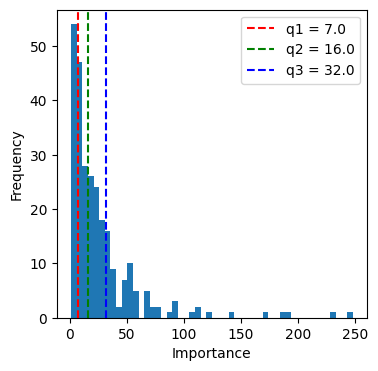

In [18]:
# Create a histogram
plt.figure(figsize=(4, 4))
plt.hist(xgb_imp['Importance'], bins=50)

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Frequency')

plt.axvline(x=q1, color='r', linestyle='--', label=f'q1 = {q1}')
plt.axvline(x=q2, color='g', linestyle='--', label=f'q2 = {q2}')
plt.axvline(x=q3, color='b', linestyle='--', label=f'q3 = {q3}')

plt.legend()

# Show plot
plt.show()

In [19]:
imp_feats = list(xgb_imp.iloc[:80]['Features'])

In [20]:
imp_feats

['sq(f39)',
 'sq(f24)',
 'sq(f70)',
 'sq(f50)',
 'sq(f31)',
 'sq(f29)',
 'sq(f52)',
 'exp(f72)',
 'sq(f17)',
 'sq(f84)',
 'sq(f19)',
 'sq(f26)',
 'sq(f54)',
 'sq(f21)',
 'sq(f77)',
 'sq(f14)',
 'sq(f79)',
 'sq(f36)',
 'sq(f7)',
 'sqrt(f35)',
 'sq(f40)',
 'sq(f43)',
 'sqrt(f23)',
 'sq(f64)',
 'log(f1)',
 'exp(f82)',
 'f78',
 'sqrt(f53)',
 'sqrt(f2)',
 'sq(f44)',
 'log(f11)',
 'log(f78)',
 'sqrt(f82)',
 'sq(f11)',
 'exp(f56)',
 'f51',
 'f37',
 'sq(f42)',
 'sq(f8)',
 'sq(f57)',
 'exp(f83)',
 'sq(f53)',
 'sqrt(f57)',
 'f69',
 'log(f84)',
 'sqrt(f69)',
 'log(f71)',
 'log(f23)',
 'log(f3)',
 'f8',
 'f14',
 'sq(f71)',
 'sq(f48)',
 'sq(f66)',
 'f28',
 'sqrt(f13)',
 'sqrt(f16)',
 'sq(f80)',
 'sq(f86)',
 'sq(f1)',
 'sq(f9)',
 'sq(f20)',
 'sqrt(f18)',
 'sq(f68)',
 'f86',
 'exp(f78)',
 'f75',
 'log(f19)',
 'f30',
 'exp(f37)',
 'f65',
 'sq(f85)',
 'f3',
 'sq(f28)',
 'log(f30)',
 'sq(f65)',
 'sq(f67)',
 'f5',
 'sq(f87)',
 'sq(f55)']

In [21]:
len(imp_feats)

80

In [22]:
df_imp = df[imp_feats]
df_imp

,sq(f39),sq(f24),sq(f70),sq(f50),sq(f31),sq(f29),sq(f52),exp(f72),sq(f17),sq(f84),sq(f19),sq(f26),sq(f54),sq(f21),sq(f77),sq(f14),sq(f79),sq(f36),sq(f7),sqrt(f35),sq(f40),sq(f43),sqrt(f23),sq(f64),log(f1),exp(f82),f78,sqrt(f53),sqrt(f2),sq(f44),log(f11),log(f78),sqrt(f82),sq(f11),exp(f56),f51,f37,sq(f42),sq(f8),sq(f57),exp(f83),sq(f53),sqrt(f57),f69,log(f84),sqrt(f69),log(f71),log(f23),log(f3),f8,f14,sq(f71),sq(f48),sq(f66),f28,sqrt(f13),sqrt(f16),sq(f80),sq(f86),sq(f1),sq(f9),sq(f20),sqrt(f18),sq(f68),f86,exp(f78),f75,log(f19),f30,exp(f37),f65,sq(f85),f3,sq(f28),log(f30),sq(f65),sq(f67),f5,sq(f87),sq(f55)
0,0.59,0.00,16.00,0.06,0.16,0.00,0.00,1.00,0.01,0.02,10.96,0.00,7.94,0.00,4.85,0.00,4.86,0.39,0.00,1.53,0.00,0.62,2.00,0.00,1.89,1.01,0.66,2.09,0.72,0.00,0.78,0.51,0.12,7.93,1.00,0.00,0.00,0.00,0.09,0.52,1.35,0.15,2.17,0.00,1.58,0.00,1.61,1.61,1.61,-0.29,0.00,0.00,0.00,0.00,0.00,2.00,1.81,0.00,0.00,2.71,0.13,0.00,2.26,9.68,0.00,1.94,0.00,2.12,0.41,1.00,1.47,3.80,0.00,0.00,0.34,2.16,0.00,0.22,0.98,12.36
1,4.47,0.00,16.00,4.79,0.01,0.00,0.00,1.00,0.00,1.39,0.01,0.00,0.05,0.00,0.64,0.01,0.66,0.07,0.00,2.65,0.00,0.92,2.00,0.01,2.02,1.00,0.57,1.67,1.75,0.00,1.83,0.45,0.04,1.49,1.00,0.00,0.00,0.43,0.16,0.83,1.21,1.48,2.22,0.00,1.82,0.00,1.61,1.61,1.61,-0.40,0.08,0.00,0.00,0.00,0.00,2.00,1.80,0.00,0.00,6.51,0.29,0.00,2.45,9.68,0.00,1.77,0.00,1.63,0.10,1.00,-3.61,0.02,0.00,0.00,0.10,13.02,0.00,0.27,0.05,12.93
2,0.98,0.00,16.00,0.02,0.01,0.00,0.00,1.00,0.50,0.54,9.18,0.00,0.30,0.00,0.02,1.01,0.04,0.07,0.00,2.24,0.00,0.22,2.00,0.05,0.24,1.00,0.52,2.11,2.23,0.00,1.41,0.42,0.04,0.82,1.00,0.00,0.00,0.44,0.44,2.32,1.20,0.19,2.35,0.00,1.45,0.00,1.61,1.61,1.61,-0.66,1.00,0.00,0.00,0.00,0.00,2.00,0.90,0.00,0.00,13.92,2.29,0.00,1.12,1.31,0.00,1.68,0.00,2.08,0.09,1.00,0.45,0.14,0.00,0.00,0.09,0.20,0.00,0.16,0.13,11.25
3,0.01,0.00,16.00,0.24,0.12,0.00,0.00,1.00,0.53,0.16,9.55,0.00,0.76,0.96,0.14,0.05,0.16,0.06,0.00,2.43,0.00,0.42,2.00,0.00,1.96,1.00,0.49,2.73,2.01,0.00,1.35,0.40,0.05,1.34,1.00,0.00,0.00,0.66,0.07,1.99,1.39,11.87,2.33,0.00,1.53,0.00,1.61,1.61,1.61,-0.27,-0.22,0.00,0.00,0.04,-0.09,2.00,0.10,0.00,0.00,4.48,2.58,0.86,2.07,6.48,0.00,1.63,0.00,2.09,0.09,1.00,-0.91,0.04,0.00,0.01,0.09,0.83,0.08,0.76,0.00,9.18
4,0.48,0.00,0.00,0.42,0.04,0.00,0.00,1.00,0.77,0.26,0.00,0.00,6.66,0.18,2.69,0.27,2.26,0.00,0.00,2.43,0.00,6.12,2.00,0.00,1.42,1.00,0.23,2.28,2.00,0.00,1.23,0.21,0.06,2.54,1.00,0.00,0.00,0.75,2.44,0.87,1.71,1.43,2.22,0.00,1.71,0.00,1.61,1.61,1.61,1.56,0.52,0.00,0.00,0.04,0.01,2.27,1.41,0.00,0.00,0.72,0.13,2.92,1.78,9.68,0.00,1.26,0.00,1.60,0.09,1.00,-0.94,0.01,0.00,0.00,0.09,0.88,0.00,0.12,0.00,14.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105437,2.08,1.25,0.00,1.04,0.18,0.00,7.65,1.64,0.03,0.00,2.35,0.05,5.88,0.00,0.02,0.00,0.63,0.00,15.76,2.67,1.43,0.11,2.32,0.00,1.81,1.02,0.19,0.00,2.26,0.32,0.40,0.17,0.13,12.31,1.00,0.31,-1.41,0.00,0.01,0.76,1.58,16.00,1.77,0.00,1.61,0.00,1.61,1.85,1.81,-0.10,0.00,0.00,0.00,0.00,-0.34,2.00,1.34,0.00,12.10,1.30,0.02,0.00,2.31,0.14,3.48,1.20,0.28,1.24,0.05,0.24,-4.00,0.01,1.11,0.12,0.04,16.00,0.00,0.00,0.08,15.36
105438,0.00,1.30,0.00,3.58,0.06,0.00,0.01,1.13,0.01,0.00,0.00,5.94,0.00,0.00,0.00,0.00,1.99,0.00,0.00,2.60,0.27,0.31,1.25,0.00,1.29,1.00,0.19,2.30,2.07,2.14,1.25,0.18,0.00,2.29,1.00,0.39,0.00,0.00,0.12,0.00,1.00,1.72,2.00,0.00,1.61,0.00,1.61,0.94,1.61,0.34,0.00,0.00,0.00,0.00,0.00,2.00,2.00,0.00,1.19,1.88,0.06,0.00,2.17,0.25,1.09,1.21,0.06,1.62,0.25,1.00,2.78,0.84,0.00,0.00,0.22,7.72,0.00,0.00,0.96,0.00
105439,0.00,0.09,0.00,0.74,0.08,0.00,0.67,1.45,0.18,0.00,1.04,0.71,16.00,0.00,0.04,0.00,0.08,0.00,0.00,2.67,0.22,0.18,0.41,0.00,1.62,1.01,0.17,2.13,2.08,1.74,1.05,0.16,0.08,4.63,1.00,0.32,-2.00,0.00,0.03,2.2

In [134]:
# Initialize PCA with 2 components
pca = PCA(n_components=2)

df_pca = pca.fit_transform(df_imp)

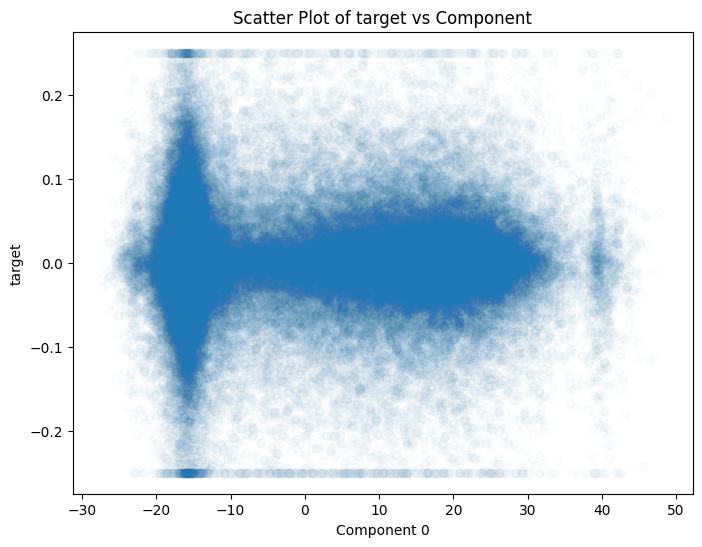

In [136]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 1], df['target'], alpha=0.02)

# Add labels and title
plt.xlabel('Component 0')
plt.ylabel('target')
plt.title('Scatter Plot of target vs Component')

# Show plot
plt.show()

component 0 - 2

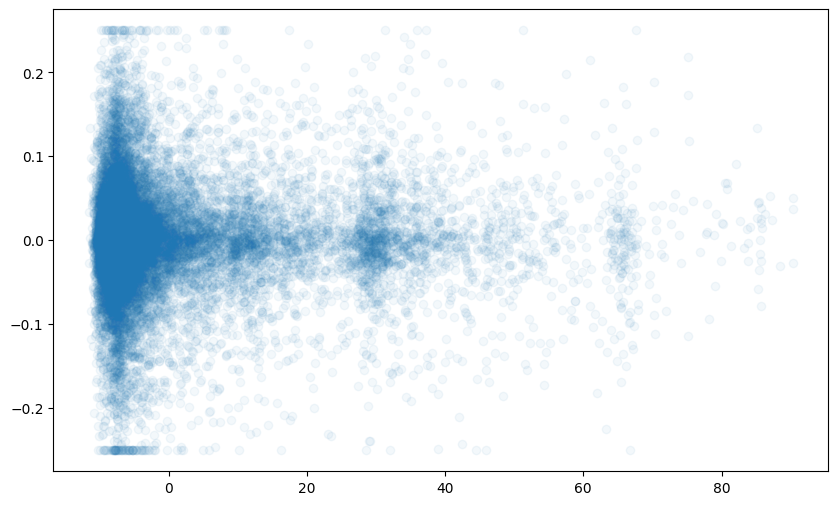

In [110]:
x = df_pca[:, 2][:20000]
y = np.array(df['target'])[:20000]

plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.scatter(x, y,alpha=0.05)

# # Adding labels and title
# plt.xlabel('X values')
# plt.ylabel('Y values')
# plt.title('Line Plot between X and Y')
# plt.legend()  # Optional: add a legend

# Showing the plot
plt.show()

# xgboost on imp feats

In [23]:
X = df_imp
y = df['target']

In [24]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Initialize the XGBRegressor
model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=1, alpha=10, n_estimators=8000)

# Train the model with the selected features
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print("mse:", mse)

mse: 0.004167197886135464


In [32]:
df_test = pd.read_csv('/kaggle/input/trexquant-2025-summer-intern-challenge-iitkgp/TQ_Test_Kaggle.csv')
df_test = df_test.fillna(0)
df_test

,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87
0,44,-0.87,0.39,1.80,0.18,0.03,0.11,0.22,0.03,-1.02,-2.49,-1.87,-0.44,-0.07,0.85,1.18,-1.04,0.24,1.12,1.10,0.00,0.00,-0.40,-0.70,-0.02,1.01,-0.63,-0.44,0.08,0.01,0.11,0.00,0.83,2.00,1.61,2.78,-0.03,-1.33,-0.83,-0.05,0.18,-0.67,-0.89,-1.95,0.06,0.02,0.66,0.47,-2.36,0.06,1.74,0.26,-0.22,0.34,-0.45,3.52,0.00,1.07,0.97,-1.90,0.27,0.62,0.00,0.00,-0.03,-1.81,-0.05,0.08,-0.40,0.26,-0.13,0.18,0.22,-2.27,0.47,0.39,0.13,-2.02,0.25,-2.01,-0.70,0.11,0.00,0.12,1.17,-0.96,3.70,0.05
1,45,-1.07,-0.00,2.83,0.10,0.07,0.26,0.00,0.00,0.71,-1.41,-1.72,0.54,0.49,0.77,-0.12,-0.49,0.77,1.12,-0.11,0.00,0.00,-1.01,0.27,0.66,-1.44,-0.95,-0.40,-0.12,-0.15,0.10,0.01,0.91,0.00,1.55,3.30,-0.03,-2.00,0.63,-0.03,-0.76,-1.69,-0.89,-0.89,-0.47,0.06,-2.31,-0.98,-2.44,0.06,0.96,0.29,0.01,1.07,0.89,-1.82,0.00,0.34,0.87,1.41,1.00,0.33,0.00,0.01,0.00,0.91,0.14,0.00,-0.54,0.18,-0.06,0.50,0.41,-2.46,0.48,0.64,0.12,-1.65,0.28,-1.65,1.38,0.12,0.00,0.13,0.87,-0.70,3.72,0.20
2,46,-0.61,0.99,-2.31,0.16,0.40,0.05,-3.01,-1.50,0.36,-2.20,0.16,0.39,0.42,0.25,-0.64,-0.58,-0.54,1.21,1.96,0.00,1.37,1.72,0.62,0.42,-0.97,0.37,-0.49,-0.12,-0.27,0.09,0.02,0.86,1.00,1.65,3.11,-0.05,-2.93,-1.71,-0.85,-1.51,0.13,-0.89,-1.19,-0.14,-0.07,-3.61,-3.59,-2.17,0.13,2.11,0.13,0.86,0.00,1.92,-0.28,0.00,0.85,0.33,-1.98,-0.87,0.17,0.00,0.03,0.06,-2.62,0.12,0.06,-0.34,0.25,0.23,1.00,0.19,-1.71,0.52,0.36,0.15,1.20,0.31,1.11,-0.57,0.12,0.00,0.09,1.03,-0.53,3.79,0.11
3,47,2.63,-0.34,0.48,0.15,0.10,-0.02,0.00,1.71,0.77,-1.29,-0.95,0.80,0.44,1.28,0.25,-0.55,-0.05,1.48,1.34,0.00,0.41,1.06,1.63,0.22,-0.27,1.84,0.32,-0.20,-0.06,0.09,0.02,0.82,2.00,1.74,0.52,-0.05,-2.64,0.00,0.64,-0.23,-0.01,-0.89,1.37,0.05,0.06,1.78,1.23,-1.73,0.24,0.20,0.86,0.57,2.80,3.11,-3.19,0.00,1.97,1.00,0.77,1.00,0.62,0.00,0.59,0.08,2.35,0.09,-0.05,-1.03,0.39,0.00,0.86,0.29,-2.36,0.31,0.43,0.12,-0.47,0.23,-0.48,2.23,0.11,0.00,0.10,1.97,-0.51,3.64,0.08
4,48,0.66,-0.85,-0.98,0.18,1.15,0.48,0.00,0.50,-0.62,-0.58,-2.57,-1.06,0.00,0.30,0.63,-0.97,0.00,1.05,-0.53,0.00,-0.34,-0.43,-0.75,-0.17,0.64,0.80,0.24,-0.11,0.43,0.08,0.03,0.82,0.00,0.95,1.94,-0.05,-2.40,0.00,-0.36,-0.66,0.80,0.13,-1.47,0.91,0.12,-0.03,-0.03,-1.24,0.39,1.63,0.24,0.15,-2.50,-1.39,3.03,0.00,1.50,0.62,1.33,-0.84,-0.21,0.00,0.00,0.02,0.02,0.07,0.05,-0.25,0.24,-0.41,2.52,0.33,-2.27,0.35,0.32,0.13,-1.31,0.26,-1.33,0.00,0.39,0.00,0.13,2.22,-0.68,3.72,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85816,191259,-0.37,-0.35,-0.40,0.09,0.65,0.47,0.00,0.00,-0.32,-2.56,-2.19,-0.55,0.00,0.00,-0.22,-3.58,-0.16,0.88,1.93,0.00,0.00,0.58,-0.45,0.62,-1.36,-0.13,-0.49,-0.16,0.27,0.32,-0.11,-1.10,1.00,0.04,2.88,-0.02,-1.33,-0.71,-3.46,0.53,1.29,-0.12,0.42,-0.09,-0.12,0.00,0.00,-1.87,0.09,2.94,0.30,0.61,1.11,-1.13,-3.27,0.00,1.10,0.52,2.14,-0.46,-0.02,0.00,0.00,0.00,1.13,0.00,0.11,0.22,0.00,-0.03,0.00,0.12,-0.79,0.26,0.49,0.07,0.71,0.15,0.45,0.00,0.02,0.00,0.78,0.49,2.27,3.49,0.55
85817,191260,0.75,1.22,0.00,0.02,0.14,-0.21,0.00,1.58,-0.04,-2.82,-1.76,-1.96,0.00,0.00,0.00,-1.22,-0.82,0.44,4.00,0.00,0.00,0.00,0.20,0.14,-0.80,1.25,0.44,-0.06,0.31,0.11,0.10,-1.00,1.00,0.05,1.38,-0.02,-2.00,-0.70,1.71,0.00,0.00,-0.56,-0.57,-0.50,-0.03,0.00,0.00,-2.20,0.11,1.97,0.95,-0.61,-0.70,1.64,-0.36,0.00,-1.83,-0.97,-0.28,0.94,0.14,2.04,0.03,0.00,4.00,0.00,-0.19,0.56,0.00,-0.07,0.00,0.16,-1.58,0.30,0.37,0.06,-0.15,0.14,-0.10,-0.89,0.13,0.00,0.48,0.00,2.11,2

In [33]:
for feat in feats:
    df_test[f'log({feat})'] = np.log(df_test[feat] - min(df_test[feat]) + 1)
    df_test[f'exp({feat})'] = np.exp(df_test[feat])
    df_test[f'sq({feat})'] = df_test[feat]**2
    df_test[f'sqrt({feat})'] = (df_test[feat] - min(df_test[feat]))**0.5

/tmp/ipykernel_33/2560977958.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[f'sq({feat})'] = df_test[feat]**2
/tmp/ipykernel_33/2560977958.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[f'sqrt({feat})'] = (df_test[feat] - min(df_test[feat]))**0.5
/tmp/ipykernel_33/2560977958.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a 

In [34]:
df_test

,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,...,sq(f75),sqrt(f75),log(f76),exp(f76),sq(f76),sqrt(f76),log(f77),exp(f77),sq(f77),sqrt(f77),log(f78),exp(f78),sq(f78),sqrt(f78),log(f79),exp(f79),sq(f79),sqrt(f79),log(f80),exp(f80),sq(f80),sqrt(f80),log(f81),exp(f81),sq(f81),sqrt(f81),log(f82),exp(f82),sq(f82),sqrt(f82),log(f83),exp(f83),sq(f83),sqrt(f83),log(f84),exp(f84),sq(f84),sqrt(f84),log(f85),exp(f85),sq(f85),sqrt(f85),log(f86),exp(f86),sq(f86),sqrt(f86),log(f87),exp(f87),sq(f87),sqrt(f87)
0,44,-0.87,0.39,1.80,0.18,0.03,0.11,0.22,0.03,-1.02,-2.49,-1.87,-0.44,-0.07,0.85,1.18,-1.04,0.24,1.12,1.10,0.00,0.00,-0.40,-0.70,-0.02,1.01,-0.63,-0.44,0.08,0.01,0.11,0.00,0.83,2.00,1.61,2.78,-0.03,-1.33,-0.83,-0.05,0.18,-0.67,-0.89,-1.95,0.06,0.02,0.66,0.47,-2.36,0.06,...,0.16,0.63,0.12,1.14,0.02,0.36,1.09,0.13,4.10,1.41,0.22,1.28,0.06,0.50,0.51,0.13,4.05,0.82,1.38,0.50,0.49,1.72,0.10,1.11,0.01,0.33,0.00,1.00,0.00,0.02,0.11,1.13,0.01,0.35,1.82,3.23,1.38,2.27,1.40,0.38,0.91,1.74,2.16,40.37,13.68,2.77,0.72,1.05,0.00,1.03
1,45,-1.07,-0.00,2.83,0.10,0.07,0.26,0.00,0.00,0.71,-1.41,-1.72,0.54,0.49,0.77,-0.12,-0.49,0.77,1.12,-0.11,0.00,0.00,-1.01,0.27,0.66,-1.44,-0.95,-0.40,-0.12,-0.15,0.10,0.01,0.91,0.00,1.55,3.30,-0.03,-2.00,0.63,-0.03,-0.76,-1.69,-0.89,-0.89,-0.47,0.06,-2.31,-0.98,-2.44,0.06,...,0.41,0.80,0.11,1.13,0.01,0.35,1.21,0.19,2.73,1.53,0.24,1.32,0.08,0.52,0.71,0.19,2.71,1.02,1.80,3.98,1.91,2.25,0.11,1.13,0.01,0.35,0.00,1.00,0.00,0.02,0.13,1.14,0.02,0.37,1.77,2.40,0.77,2.21,1.46,0.50,0.49,1.82,2.17,41.42,13.87,2.78,0.79,1.22,0.04,1.09
2,46,-0.61,0.99,-2.31,0.16,0.40,0.05,-3.01,-1.50,0.36,-2.20,0.16,0.39,0.42,0.25,-0.64,-0.58,-0.54,1.21,1.96,0.00,1.37,1.72,0.62,0.42,-0.97,0.37,-0.49,-0.12,-0.27,0.09,0.02,0.86,1.00,1.65,3.11,-0.05,-2.93,-1.71,-0.85,-1.51,0.13,-0.89,-1.19,-0.14,-0.07,-3.61,-3.59,-2.17,0.13,...,0.13,0.60,0.14,1.16,0.02,0.38,1.83,3.33,1.45,2.28,0.27,1.36,0.09,0.55,1.57,3.04,1.24,1.95,1.41,0.57,0.33,1.76,0.11,1.13,0.01,0.34,0.00,1.00,0.00,0.05,0.09,1.09,0.01,0.30,1.80,2.81,1.06,2.24,1.50,0.59,0.28,1.86,2.17,44.28,14.37,2.79,0.74,1.11,0.01,1.05
3,47,2.63,-0.34,0.48,0.15,0.10,-0.02,0.00,1.71,0.77,-1.29,-0.95,0.80,0.44,1.28,0.25,-0.55,-0.05,1.48,1.34,0.00,0.41,1.06,1.63,0.22,-0.27,1.84,0.32,-0.20,-0.06,0.09,0.02,0.82,2.00,1.74,0.52,-0.05,-2.64,0.00,0.64,-0.23,-0.01,-0.89,1.37,0.05,0.06,1.78,1.23,-1.73,0.24,...,0.18,0.65,0.11,1.13,0.01,0.35,1.51,0.62,0.22,1.88,0.21,1.26,0.05,0.48,1.16,0.62,0.23,1.48,1.93,9.32,4.98,2.43,0.11,1.12,0.01,0.34,0.00,1.00,0.00,0.03,0.09,1.10,0.01,0.31,1.94,7.17,3.88,2.44,1.50,0.60,0.26,1.87,2.16,38.02,13.24,2.76,0.73,1.09,0.01,1.04
4,48,0.66,-0.85,-0.98,0.18,1.15,0.48,0.00,0.50,-0.62,-0.58,-2.57,-1.06,0.00,0.30,0.63,-0.97,0.00,1.05,-0.53,0.00,-0.34,-0.43,-0.75,-0.17,0.64,0.80,0.24,-0.11,0.43,0.08,0.03,0.82,0.00,0.95,1.94,-0.05,-2.40,0.00,-0.36,-0.66,0.80,0.13,-1.47,0.91,0.12,-0.03,-0.03,-1.24,0.39,...,0.10,0.57,0.12,1.14,0.02,0.36,1.31,0.27,1.71,1.64,0.23,1.29,0.07,0.51,0.85,0.26,1.77,1.16,1.54,1.00,0.00,1.91,0.33,1.48,0.15,0.63,0.00,1.00,0.00,0.02,0.12,1.14,0.02,0.36,1.98,9.19,4.92,2.49,1.46,0.51,0.46,1.82,2.17,41.43,13.87,2.78,0.78,1.20,0.03,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85816,191259,-0.37,-0.35,-0.40,0.09,0.65,0.47,0.00,0.00,-0.32,-2.56,-2.19,-0.55,0.00,0.00,-0.22,-3.58,-0.16,0.88,1.93,0.00,0.00,0.58,-0.45,0.62,-1.36,-0.13,-0.49,-0.16,0.27,0.32,-0.11,-1.10,1.00,0.04,2.88,-0.02,-1.33,-0.71,-3.46,0.53,1.29,-0.12,0.42,-0.09,-0.12,0.00,0.00,-1.87,0.09,...,0.24,0.70,0.07,1.07,0.

In [35]:
X_test = df_test[imp_feats]

y_test = model.predict(X_test)

In [36]:
# Create DataFrame for predictions
df_output = pd.DataFrame({"row_id": np.array(df_test['row_id']), 'target': y_test})

# Define filename for saving predictions
filename = "/kaggle/working/predictions_xgb_transform_80_8k_n_estimator.csv"

# Save predictions to CSV file
df_output.to_csv(filename, index=False)

print(f"Successfully Saved in File: {filename}")

Successfully Saved in File: /kaggle/working/predictions_xgb_transform_80_8k_n_estimator.csv


In [56]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [200, 300, 400, 500],
    'learning_rate': [0.1],
    'max_depth': [2, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.2, 0.3],
    'alpha': [1, 10, 50]
}

# Initialize GridSearchCV with the XGBRegressor
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(alpha=10, base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.3,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rat...
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=300,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'alpha': [1, 10, 50], 'colsample_bytree': [0.2, 0.3],
                         'learning_rate': [0.1], 'max_depth': [2, 3, 5],
                         'n_estimators': [200, 300, 400, 500],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [57]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Predict and evaluate the best model
y_pred = best_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print("mse:", mse)

Best parameters found:  {'alpha': 10, 'colsample_bytree': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
mse: 0.004167581099939636


# rfecv

In [63]:
# Initialize the XGBRegressor
model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=300)

# Initialize RFECV with the XGBRegressor
rfecv = RFECV(estimator=model, step=1, cv=5, scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [64]:
# Fit RFECV
rfecv.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Get the optimal number of features
optimal_num_features = rfecv.n_features_
print("Optimal number of features:", optimal_num_features)

# Get the selected features
selected_features = X.columns[rfecv.support_]
print("Selected Features:", selected_features)

In [ ]:
# Transform the training and testing data
X_train_rfecv = rfecv.transform(X_train)
X_val_rfecv = rfecv.transform(X_val)

# Train the model with the selected features
model.fit(X_train_rfecv, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_val_rfecv)

mse = mean_squared_error(y_val, y_pred)
print("mse:", mse)

In [ ]:
gh = 